# Atividade 7 até 12

## Importando bibliotecas e chaves necessárias

In [53]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import transformers
import torch
from dotenv import load_dotenv
import os
import pathlib
import textwrap
import yaml
import json

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

load_dotenv('.env')

genai.configure(api_key=os.environ["GEMINI_KEY"])
model = genai.GenerativeModel("gemini-1.5-flash")

## Atividade 7: Resumo de Notícia Utilizando Exemplos em Prompts

Usando a API Gemini, crie um notebook que utilize prompts para resumir uma notícia (escolha da página principal de um portal de notícias e copie no notebook). O prompt deve solicitar um resumo dessa notícia usando o princípio de Exemplos para guiar a resposta do LLM. Teste o código e avalie a qualidade do resumo gerado. 

In [17]:
noticia = """
O Cruzeiro acertou a contratação de Gabigol. O jogador anunciou sua saída do Flamengo depois do título da Copa do Brasil, neste domingo, com vitória por 1 a 0 sobre o Atlético-MG, na Arena MRV.
A diretoria do Cruzeiro trata o atacante como o principal investimento em termos salariais para a próxima temporada e ofereceu ao atleta um contrato de quatro anos, ainda com um pagamento de luvas ao atacante do Flamengo.
Ainda não há assinatura de acordo entre Cruzeiro e Gabigol, mas todas as bases estão desenhadas para a oficialização. O clube mineiro luta por uma vaga na próxima Conmebol Libertadores e tem a decisão na Copa Sul-Americana, dia 23, contra o Racing, no Paraguai.
Em declaração oficial, o CEO da Raposa, Alexandre Mattos, despistou sobre o acerto com o atacante, mas disse ser um "motivo de satisfação" ter Gabigol ligado ao clube.

- Nós não vamos confirmar nenhuma movimentação no mercado de transferências neste momento, porque o Cruzeiro está totalmente focado em cumprir os objetivos desta reta final de temporada e temos completa confiança no nosso elenco atual. Mas, para nós, é motivo de satisfação poder acompanhar via imprensa sempre o nome de grandes atletas relacionados ao Cruzeiro, como foi o caso do Gabigol, Arias, entre outros. Isso mostra que todos que acompanham o futebol sabem que o nosso projeto é para sermos protagonistas em todos os campeonatos e que a credibilidade do clube está voltando graças ao nosso Presidente Pedro Lourenço. No momento certo, vamos falar diretamente com o nosso torcedor sobre o planejamento para o futebol do Cruzeiro das próximas temporadas.
- Foi um ano conturbado para mim individualmente, (houve a) questão do doping, depois um treinador que não me respeitava como jogador. Durante esses momentos, nunca tentei externar isso de alguma forma, mas foi período horrível para mim - disse Gabigol.

Gabriel Barbosa, de 28 anos, sempre foi um desejo do dono da SAF do Cruzeiro, Pedro Lourenço. Ele já teceu elogios ao atacante, na janela do meio do ano, mas informou que não teria condições de investir naquele momento.
A posição é o ponto de atenção principal do Cruzeiro para a próxima temporada. Em diversos momentos, Pedro Lourenço disse que busca um homem-gol para o próximo ano. Na última semana, voltou a ressaltar este desejo.
Gabigol é ídolo do Flamengo. Em seis anos, marcou 160 gols em 305 jogos pelo clube. Ganhou, entre outros títulos, duas Conmebol Libertadores (2019 e 2022), dois Brasileiros (2019 e 2020) e duas Copas do Brasil (2022 e 2024).

O contrato do atacante com a equipe rubro-negra acaba em 31 de dezembro deste ano. Houve longa negociação para renovação do contrato, mas não houve acordo entre as partes.
"""

In [25]:
response_7 = model.generate_content(f"""
                                  Como um especialista em futebol, faça o resumo da notícia para uma pessoa com pouco tempo para ler e que é torcedora do Flamengo. 
                                  Tente resumir em até 3 linhas.
                                  A noticia é {noticia}
                                  """)
print(response_7.text)

Gabigol, ídolo do Flamengo, acertou com o Cruzeiro e vai deixar o Mengão após a conquista da Copa do Brasil. A diretoria celeste vê o atacante como principal investimento para a próxima temporada e ofereceu um contrato de quatro anos. Essa notícia, porém, é um baque para a torcida rubro-negra que se despede de um dos maiores artilheiros da história do clube. 



Dado o resultado acima, e a especificação que passei, o LLM funcionou muito bem focando em trazer um contexto para o torcedor flamenguista e deixar um resumo simples em até 3 linhas, para um público que não teria tanto tempo para parar e ler a notícia completa. \
Além disso, o código funcionou muito bem, sem dificuldades para rodar.

## Atividade 8:  Identificação de Entidades em Notícias com LLM
Uma consultoria lhe contratou para automatizar a descoberta de pessoas mencionadas em notícias de jornal. Com base no Exercício 7, escolha 3 notícias e monte uma aplicação com um prompt para o LLM identificar menções a diferentes entidades em cada notícia (como pessoas, órgãos públicos, empresas…). Implemente um notebook para testar o código usando a API do Gemini. Descreva o prompt, seus resultados e avalie se a resposta do modelo atende às expectativas da consultoria.

In [22]:
noticia_1 = """
Cruzeiro acerta com Gabigol, que deixará o Flamengo
Campeão da Copa do Brasil, atacante assinará contrato de quatro anos com o clube mineiro
Por Janir Júnior, Gabriel Duarte e Pedro Rocha — Rio de Janeiro e Belo Horizonte

10/11/2024 18h17  Atualizado há 23 minutos

"Não vou ficar no Flamengo", revela Gabigol após conquista da Copa do Brasil

O Cruzeiro acertou a contratação de Gabigol. O jogador anunciou sua saída do Flamengo depois do título da Copa do Brasil, neste domingo, com vitória por 1 a 0 sobre o Atlético-MG, na Arena MRV.

A diretoria do Cruzeiro trata o atacante como o principal investimento em termos salariais para a próxima temporada e ofereceu ao atleta um contrato de quatro anos, ainda com um pagamento de luvas ao atacante do Flamengo.

Ainda não há assinatura de acordo entre Cruzeiro e Gabigol, mas todas as bases estão desenhadas para a oficialização. O clube mineiro luta por uma vaga na próxima Conmebol Libertadores e tem a decisão na Copa Sul-Americana, dia 23, contra o Racing, no Paraguai.


Em declaração oficial, o CEO da Raposa, Alexandre Mattos, despistou sobre o acerto com o atacante, mas disse ser um "motivo de satisfação" ter Gabigol ligado ao clube.

- Nós não vamos confirmar nenhuma movimentação no mercado de transferências neste momento, porque o Cruzeiro está totalmente focado em cumprir os objetivos desta reta final de temporada e temos completa confiança no nosso elenco atual. Mas, para nós, é motivo de satisfação poder acompanhar via imprensa sempre o nome de grandes atletas relacionados ao Cruzeiro, como foi o caso do Gabigol, Arias, entre outros. Isso mostra que todos que acompanham o futebol sabem que o nosso projeto é para sermos protagonistas em todos os campeonatos e que a credibilidade do clube está voltando graças ao nosso Presidente Pedro Lourenço. No momento certo, vamos falar diretamente com o nosso torcedor sobre o planejamento para o futebol do Cruzeiro das próximas temporadas.

Gabigol comemora o título da Copa do Brasil — Foto: Cris Mattos/Reuters
Gabigol comemora o título da Copa do Brasil — Foto: Cris Mattos/Reuters


- Foi um ano conturbado para mim individualmente, (houve a) questão do doping, depois um treinador que não me respeitava como jogador. Durante esses momentos, nunca tentei externar isso de alguma forma, mas foi período horrível para mim - disse Gabigol.

Gabriel Barbosa, de 28 anos, sempre foi um desejo do dono da SAF do Cruzeiro, Pedro Lourenço. Ele já teceu elogios ao atacante, na janela do meio do ano, mas informou que não teria condições de investir naquele momento.

"Fica, Gabigol!": torcida do Flamengo grita o nome do jogador após título

A posição é o ponto de atenção principal do Cruzeiro para a próxima temporada. Em diversos momentos, Pedro Lourenço disse que busca um homem-gol para o próximo ano. Na última semana, voltou a ressaltar este desejo.


Gabigol é ídolo do Flamengo. Em seis anos, marcou 160 gols em 305 jogos pelo clube. Ganhou, entre outros títulos, duas Conmebol Libertadores (2019 e 2022), dois Brasileiros (2019 e 2020) e duas Copas do Brasil (2022 e 2024).

O contrato do atacante com a equipe rubro-negra acaba em 31 de dezembro deste ano. Houve longa negociação para renovação do contrato, mas não houve acordo entre as partes.
"""

In [23]:
noticia_2 = """
Grêmio terá mudança na dupla de zaga contra o Juventude
Jemerson recebeu o terceiro cartão amarelo contra o Palmeiras e terá de cumprir suspensão
Por Redação do ge — Porto Alegre

09/11/2024 14h42  Atualizado há um dia

O técnico Renato Portaluppi terá de mudar novamente a dupla de zaga do Grêmio no próximo compromisso no Campeonato Brasileiro, contra o Juventude. Na derrota para o Palmeiras, Jemerson levou o terceiro cartão amarelo e terá de cumprir suspensão. Gustavo Martins está recuperado de lesão e deve ser o substituto.

Aos 25 min do 1º tempo - cartão amarelo de Jemerson do Grêmio contra o Palmeiras

Depois da derrota em São Paulo, o Tricolor só volta a campo no dia 20, depois da pausa para a data Fifa. Até lá, a comissão técnica gremista tem a missão de deixar Gustavo Martins pronto para entrar em campo.

O jovem zagueiro não atua desde o dia 4 de outubro, quando saiu no primeiro tempo da vitória por 3 a 1 sobre o Fortaleza, na Arena, por uma lesão de grau 2b no bíceps femoral da coxa esquerda.

Ao longo da última semana, o jogador participou dos trabalhos no CT Luiz Carvalho e foi liberado do ponto de vista clínico. Porém, Renato optou preservar Gustavo para o jogo contra o Juventude pelo de fato da dupla de zaga titular ter entrado em campo contra o Palmeiras pendurada.

As outras opções do treinador para a posição são Natã, Geromel e Rodrigo Caio. Nesta semana, Kannemann foi submetido a uma cirurgia no quadril direito e só volta a atuar em 2025.

A delegação do Grêmio retornou de São Paulo na manhã deste sábado. O grupo de jogadores recebeu três dias de folga e se reapresenta no CT Luiz Carvalho, em Porto Alegre, na terça-feira. Serão nove dias de preparação até o duelo contra o Juventude.
"""

In [24]:
noticia_3 = """
Crise no Real Madrid é exemplo de como é difícil encaixar time de craques
Vitória sobre o Osasuna não diminuiu as críticas ao trabalho de Ancelotti e o início ruim na temporada, com maus resultados na Liga dos Campeões e crise interna

10/11/2024 11h29  Atualizado há 9 horas

Real Madrid 4 x 0 Osasuna | Gols | 13ª rodada | La Liga

Nem a vitória de 4 a 0 sobre o Osasuna, com hat-trick de Vinícius Júnior, foi capaz de acalmar o início conturbado de temporada do Real Madrid. Éder Militão deixou o gramado por conta de uma grave lesão no joelho e Rodrygo se lesionou ainda no primeiro tempo.

São ainda mais problemas para uma temporada que esteve longe de começar bem. Carlo Ancelotti sofre para encaixar Mbappé no time e vê o Barcelona aumentar a liderança no Campeonato Espanhol enquanto o Real patina na Liga dos Campeões: são duas derrotas em quatro rodadas até aqui, para o Lille e o Milan.


Vini Jr. marca três gols, e Real Madrid vence Osasuna — Foto: GettyImages
Vini Jr. marca três gols, e Real Madrid vence Osasuna — Foto: GettyImages

Pode parecer estranho um time que tem Kylian Mbappé, Vinícius Júnior e Rodrygo no ataque sofrer. Ainda mais com Camavinga, Modric e Bellingham no meio. O motivo é simples: o jogo não é individual. Não basta escalar os melhores e deixar que resolvam. Até o craque precisa de uma engrenagem para fazer o time funcionar.


Os problemas do Real estão na engrenagem, não na escalação.


A chegada de Mbappé (e Endrick) obrigou Ancelotti a sacrificar a base do time que venceu a última Liga dos Campeões. Ele manteve o 4-4-2 de sempre com Mbappé e Vini no ataque. No meio-campo, os problemas: Bellingham continua como meia avançado, como gosta de jogar, e obriga Rodrygo a ficar fora do time para Valverde fechar melhor o lado.

Só que esse ajuste não é o suficiente. O Real vem defendendo mal na temporada. Os adversários não encontram resistência para sair tocando, uma vez que a pressão de Mbappé e Vini não é tão forte. Quando a bola chega no meio, Tchouaméni ou Modric ficam sobrecarregados e tudo "estoura" na defesa.

Veja a imagem abaixo: o meio do Real sobe, dá espaço e a bola chega ao ataque.

Real Madrid joga num 4-4-2 que ainda não encaixou na temporada — Foto: Reprodução
Real Madrid joga num 4-4-2 que ainda não encaixou na temporada — Foto: Reprodução


Construção das jogadas é o principal problema
Além de defender mal, o Real ataca mal. Muito mal. Com a aposentadoria de Kroos, o time perdeu o camisa 5 que pensava e dava qualidade ao jogo lá atrás. Ancelotti aposta na titularidade de Modric, que vinha jogando nas últimas temporadas como meia mais avançado.

O resultado é que a bola sai lá de trás quadrada: quando Bellingham não busca o passe lá atrás ou Modric não encontra uma solução, o time aposta nas ligações diretas. São muitas, sempre buscando o que há de mais potente no time: a correria para o pelotão de frente. Boa parte dos (muitos) gols perdidos de Mbappé vem da situação abaixo: ele só recebe no espaço, para correr, nunca em reais condições de caprichar.

Real Madrid abusa das ligações diretas: falta um camisa 5 — Foto: Reprodução
Real Madrid abusa das ligações diretas: falta um camisa 5 — Foto: Reprodução


A pergunta que fica é: como encaixar um time repleto de bons jogadores, comprovadamente vencedores, mas que não conseguem jogar bem juntos?

Futebol é e sempre será coletivo. Logo, a resposta está na engrenagem. O encaixe do Real passa pela adaptação de diversos jogadores, incluindo os mais craques. Vini Júnior, que merecia a Bola de Ouro pela temporada incrível que fez, mostrou que não é impossível um craque mudar. De ponta, virou centroavante e fez gol na final da Liga dos Campeões.

É o exemplo para Bellingham, Tchouaméni, Camavinga e até Mbappé. Todos jovens, com potencial de fazerem mais de uma só função. O Real precisa de uma circulação maior de bola no meio. De movimentações mais rápidas, sempre sem a bola, para que a bola seja tocada por dentro e chegue nos atacantes com qualidade.

Dorival Júnior chama de "trabalho sujo" o que Bellingham faz abaixo: sai lá do lado, recebe o passe e toca para o lado. Não dá manchete, não resulta em gol. Mas faz o time funcionar como um todo.


Bellingham deve ajustar posicionamento para virar mais meia — Foto: Reprodução
Bellingham deve ajustar posicionamento para virar mais meia — Foto: Reprodução

Não é a primeira vez que um time assim dá as caras no futebol. Aquele Flamengo com Romário, Sávio e Edmundo será sempre lembrado. O PSG de Messi, Neymar e Mbappé e seu fracasso retumbante em tudo o que disputou é outro. No Real, sempre houve um Valverde ou Guti que fazia os Galáticos conseguirem se entender.

Resta a Ancelotti quebrar a cabeça para encaixar um time, o que o Real ainda não foi no 2º semestre de 2024.
"""

In [32]:
response_8 = model.generate_content(f"""
                                  Identifique em cada notícia as pessoas presentes dentro da notícia (como pessoas, fotógrafos, jogadores...), seguindo o exemplo abaixo extraído da {noticia_1}:
                                  ###
                                  Notícia 1

                                  Autor: Janir Júnior, Gabriel Duarte e Pedro Rocha
                                  Personagens: Gabigol, Alexandre Mattos, Pedro Lourenço
                                  Fotografo: Cris Mattos/Reuters
                                  ###
                                  Pense que uma consultoria o contratou para realizar esssa operação.
                                  As notícias serão: {noticia_1}, {noticia_2} e {noticia_3}
                                  """)

print(response_8.text)

## Pessoas Presentes nas Notícias:

**Notícia 1:**

* **Autores:** Janir Júnior, Gabriel Duarte, Pedro Rocha
* **Personagens:** Gabigol, Alexandre Mattos, Pedro Lourenço
* **Fotógrafo:** Cris Mattos/Reuters

**Notícia 2:**

* **Autor:** Redação do ge
* **Personagens:** Renato Portaluppi, Jemerson, Gustavo Martins, Natã, Geromel, Rodrigo Caio, Kannemann
* **Não há fotógrafos mencionados.**

**Notícia 3:**

* **Autor:** Não especificado, provavelmente Redação do ge
* **Personagens:** Carlo Ancelotti, Vinícius Júnior, Éder Militão, Rodrygo, Kylian Mbappé, Camavinga, Modric, Bellingham, Tchouaméni, Kroos, Valverde, Guti, Dorival Júnior, Messi, Neymar, Edmundo
* **Fotógrafo:** GettyImages
* **Outros:** Não há menção a fotógrafos, mas a imagem "Vini Jr. marca três gols, e Real Madrid vence Osasuna" é creditada a GettyImages.

**Observações:**

* A primeira notícia indica que o autor da imagem é Cris Mattos, da agência Reuters.
* A segunda notícia não menciona fotógrafos.
* A terceira notícia

Fiquei satisfeito com o resultado retornardo pelo LLM. Com os exemplos que passei, ele buscou muito bem o que eu havia solicitado. \
Em alguns pontos, o site não continha dados suficientes para ser preenchido, então ele deixou informado que não haviam os dados solicitados. \
Não passei isso no exemplo, mas o fato de eu ter espeficiado apenas personagens, fotógrafos e autor, ele desconsiderou a possiblidade de criar novos campos. Na notícia 3, ele criou um campo de "Outros", mas apenas esse teve essa nova implementação.

## Atividade 9: Cálculo de Tokens em Texto Longo com API Gemini

Implemente um notebook que use a API Gemini para calcular a quantidade de tokens necessários para processar um texto de 5.000 palavras. Baseie-se no modelo de tokenização utilizado por Gemini e explique como a quantidade de tokens influencia o custo e o desempenho da interação com LLMs em textos longos.

In [36]:
texto_5k_palavras = """
A UEFA Champions League, anteriormente conhecida como Copa dos Campeões Europeus, representa o ápice do futebol de clubes no continente europeu e, por consequência, no mundo. Desde sua criação em 1955, esta competição tem sido o palco das mais memoráveis histórias do futebol, reunindo os melhores clubes, jogadores e técnicos em busca da tão cobiçada "orelhuda", como é carinhosamente chamado o troféu.

O Real Madrid, indiscutivelmente, é o maior campeão da história da competição, com impressionantes 14 títulos. A dinastia merengue começou logo nos primeiros anos do torneio, quando conquistou as cinco primeiras edições (1956-1960), estabelecendo uma hegemonia que seria praticamente impossível de ser igualada por qualquer outro clube.

A gênese da competição remonta ao período pós-Segunda Guerra Mundial, quando a Europa buscava se reconstruir não apenas economicamente, mas também culturalmente. O futebol, como elemento agregador e pacificador, teve papel fundamental neste processo. A ideia de criar um torneio que reunisse os campeões nacionais de cada país surgiu através do jornal francês L'Équipe, mais especificamente de seu editor Gabriel Hanot.

O primeiro torneio, realizado na temporada 1955/56, contou com 16 equipes participantes, sendo que algumas foram convidadas sem serem necessariamente campeãs de seus países. O Real Madrid venceu a primeira edição ao derrotar o Stade de Reims na final por 4-3, iniciando ali sua lendária história na competição.

A década de 1960 viu o surgimento de outros gigantes europeus. O Benfica de Eusébio conquistou dois títulos consecutivos (1961 e 1962), enquanto o Milan de Gianni Rivera e o Inter de Milão de Helenio Herrera também deixaram suas marcas. O Celtic se tornou o primeiro clube britânico a conquistar o título em 1967, com um time formado inteiramente por jogadores nascidos num raio de 50 quilômetros de Glasgow.

Os anos 1970 foram marcados pelo domínio do Ajax e do Bayern de Munique. O clube holandês, liderado por Johan Cruyff e praticando o "Futebol Total", venceu três vezes consecutivas (1971-1973). Logo em seguida, o Bayern, com Franz Beckenbauer como principal estrela, também conquistou três títulos seguidos (1974-1976).

A década de 1980 trouxe novos protagonistas. O Liverpool consolidou sua força com quatro conquistas (1977, 1978, 1981 e 1984), enquanto o Nottingham Forest de Brian Clough surpreendeu a todos com dois títulos consecutivos (1979 e 1980). O final desta década viu o surgimento do Milan de Arrigo Sacchi, que revolucionou o futebol tático e conquistou duas taças (1989 e 1990).

Em 1992, a competição passou por uma reformulação significativa, mudando seu nome para UEFA Champions League. O novo formato incluiu uma fase de grupos antes do mata-mata, aumentando significativamente o número de jogos e, consequentemente, as receitas dos clubes participantes.

O Ajax de 1995, com jovens talentos como Clarence Seedorf e Patrick Kluivert, mostrou que ainda era possível vencer com times formados principalmente nas categorias de base. O Borussia Dortmund surpreendeu em 1997, vencendo a favorita Juventus na final.

O Manchester United protagonizou um dos momentos mais dramáticos da história da competição em 1999, quando virou o jogo contra o Bayern de Munique nos acréscimos da final, com dois gols nos últimos três minutos, conquistando uma tríplice coroa histórica.

Os anos 2000 começaram com o domínio espanhol. Real Madrid conquistou sua oitava e nona Champions (2000 e 2002), enquanto o Barcelona iniciava sua ascensão como potência do futebol europeu. O Milan manteve sua tradição vencendo em 2003 e 2007, embora tenha sofrido uma histórica derrota para o Liverpool na final de 2005, quando liderava por 3-0 no primeiro tempo e acabou perdendo nos pênaltis.

O Barcelona de Pep Guardiola revolucionou o futebol entre 2009 e 2011, conquistando dois títulos com um estilo de jogo baseado na posse de bola e na pressão alta. Lionel Messi emergiu como o grande protagonista desta era, formando com Xavi e Iniesta um dos meios-campos mais talentosos da história.

A década de 2010 foi marcada pelo retorno triunfal do Real Madrid. O clube conquistou quatro títulos em cinco anos (2014, 2016, 2017 e 2018), com Cristiano Ronaldo como principal estrela. A "La Décima", conquistada em 2014, foi especialmente significativa, pois o clube esperava 12 anos para conquistar seu décimo título.

O Bayern de Munique manteve sua tradição vencendo em 2013 e 2020, com o último título sendo conquistado em um formato especial devido à pandemia de COVID-19, com jogos únicos em sede neutra. O Liverpool voltou ao topo em 2019, sob o comando de Jürgen Klopp, conquistando seu sexto título.

Em termos de estatísticas, após o Real Madrid com seus 14 títulos, o Milan aparece como segundo maior vencedor com 7 conquistas, seguido por Liverpool e Bayern de Munique com 6 cada. Barcelona e Ajax completam o top 6 com 5 títulos cada.

A competição também é palco de recordes individuais impressionantes. Cristiano Ronaldo é o maior artilheiro da história com 140 gols, seguido por Lionel Messi com 129. Francisco Gento, lendário jogador do Real Madrid, é o recordista de títulos como jogador, com 6 conquistas.

A Champions League também é conhecida por suas tradições icônicas. O hino da competição, composto por Tony Britten em 1992, tornou-se uma das músicas mais reconhecíveis do esporte mundial. O troféu, com suas características "orelhas", é um dos mais distintivos do futebol.

O formato atual da competição envolve 32 equipes na fase de grupos, divididas em 8 grupos de 4 times cada. Os dois primeiros de cada grupo avançam para as oitavas de final, quando começa a fase eliminatória. As finais são eventos grandiosos, geralmente realizados em estádios neutros previamente escolhidos.

A competição também teve papel fundamental na evolução tática do futebol. Diferentes escolas e filosofias de jogo se encontram, proporcionando evoluções significativas na forma como o esporte é jogado. Do "catenaccio" italiano ao "futebol total" holandês, da "tiki-taka" espanhola ao "gegenpressing" alemão, a Champions League tem sido um laboratório de inovações táticas.

O aspecto financeiro da competição também merece destaque. Os prêmios distribuídos pela UEFA aumentaram significativamente ao longo dos anos, tornando a Champions League uma fonte crucial de receitas para os clubes. Isso, por sua vez, influencia diretamente na capacidade dos times de contratar e manter grandes jogadores.

A competição também tem sido palco de grandes reviravoltas e momentos dramáticos. A "Remontada" do Barcelona contra o PSG em 2017, quando o time espanhol reverteu uma derrota por 4-0 com uma vitória por 6-1 no jogo de volta, é um exemplo clássico. Ou a final de 2012, quando o Chelsea, contra todas as probabilidades, venceu o Bayern de Munique no próprio Allianz Arena.

Os goleiros também escreveram capítulos importantes na história da Champions. Lev Yashin, Dino Zoff, Peter Schmeichel, Oliver Kahn, Iker Casillas e Manuel Neuer são alguns dos nomes que se tornaram lendas defendendo suas equipes nas partidas mais importantes.

A competição também serviu como vitrine para grandes técnicos. Sir Alex Ferguson, Arrigo Sacchi, Johan Cruyff, Carlo Ancelotti, José Mourinho e Pep Guardiola são alguns dos treinadores que deixaram suas marcas na história do torneio, cada um com sua filosofia particular de jogo.

As transmissões televisivas da Champions League se tornaram eventos globais, atingindo audiências bilionárias. A final é regularmente um dos eventos esportivos mais assistidos do mundo, superando inclusive muitas partidas de Copa do Mundo.

A competição também teve impacto significativo na cultura do futebol. Os confrontos entre grandes clubes criaram rivalidades históricas, como Real Madrid x Bayern de Munique, Barcelona x Chelsea, ou Milan x Liverpool. Estas partidas transcendem o aspecto esportivo e se tornam verdadeiros choques de culturas e tradições futebolísticas.

O desenvolvimento da Champions League também reflete as mudanças no futebol europeu como um todo. A implementação do Fair Play Financeiro, as mudanças nos formatos de competição, a introdução do VAR e outras inovações tecnológicas mostram como o torneio se mantém na vanguarda do desenvolvimento do esporte.

Os estádios que receberam finais da Champions League formam uma lista impressionante de templos do futebol: Wembley, San Siro, Bernabéu, Camp Nou, Olímpico de Roma, entre outros. Cada um destes palcos contribuiu para criar momentos inesquecíveis na história da competição.

A Champions League também teve papel fundamental no desenvolvimento do futebol feminino. A UEFA Women's Champions League, criada em 2001, segue os passos de sua contraparte masculina e tem crescido significativamente em prestígio e visibilidade.

O futuro da competição continua em evolução. Discussões sobre novos formatos, número de participantes e distribuição de recursos financeiros mostram que a Champions League continua se adaptando às mudanças no cenário do futebol mundial.

A importância da Champions League para o futebol mundial é inestimável. Mais do que uma competição de clubes, ela representa a excelência do futebol, onde os melhores times, jogadores e técnicos se encontram para criar espetáculos memoráveis que transcendem gerações.

As histórias de sucesso e fracasso, os gols históricos, as defesas milagrosas, as táticas inovadoras e as emoções intensas continuam a fazer da UEFA Champions League a competição de clubes mais prestigiada do planeta. Seu legado, construído ao longo de mais de seis décadas, permanece como um testemunho da grandeza do futebol como esporte e fenômeno cultural.

À medida que o futebol continua a evoluir, a Champions League mantém seu papel como a competição que define a excelência no esporte. Seus próximos capítulos certamente continuarão a adicionar novas páginas gloriosas à rica história do futebol mundial.
"""

In [38]:
response_9 = model.generate_content(f""" 
    Calcule a quantidade de tokens necessários para processar o texto de 5.000 palavras, que é o {texto_5k_palavras}. Baseie-se no modelo de tokenização do Gemini.
    Além disso, explique como a quantidade de tokens influencia o custo e o desempenho da interação com LLMs em textos longos
""")

print(response_9.text)

## Quantidade de Tokens para o Texto da Champions League:

O texto sobre a UEFA Champions League possui aproximadamente **5.000 palavras**. Para estimar a quantidade de tokens, podemos usar a regra de que **uma palavra corresponde a 1,5 tokens**.

Portanto, o texto possui aproximadamente: 5.000 palavras * 1,5 tokens/palavra = **7.500 tokens**.

**É importante lembrar que essa estimativa pode variar dependendo do modelo de tokenização utilizado.** O Gemini, por exemplo, possui um modelo próprio de tokenização, que pode resultar em uma contagem de tokens diferente.

## Impacto da Quantidade de Tokens no Custo e Desempenho:

A quantidade de tokens influencia diretamente o custo e o desempenho da interação com LLMs em textos longos:

**Custo:**

* **Modelos de LLMs geralmente cobram por token processado.** Quanto maior a quantidade de tokens, maior será o custo para processar o texto.
* O custo de processar 7.500 tokens pode ser significativamente mais alto do que processar um texto menor.

O cálculo de tokens aproximados que o Gemini utilizaria para esse texto é de ~7.500 tokens! \
Ao solicitar a explicação de como a quantidade de tokens influencia o custo e o desempenho, pelo o que foi aprendido em aula até agora o texto está muito de acordo. \
Na descrição sobre o custo, o LLM trouxe de uma forma extremamente simples o custo que pode ser gerado sobre 7.500 tokens e um texto menor, visto que o LLM usa a quantidade de tokens para poder calcular seu custo. \
Na aba de desempenho, trouxe os contrapontos de ter um texto longo, como a precisão por conta do contexto muito grande, limitação de memória por ter muitos parâmetros e tempo de resposta aumentado por conta de demora para conseguir processar todas esses dados.

## Atividade 11 Estruturação de Prompts com Arquivo YAML

Crie um arquivo YAML que represente a estrutura:
{‘'roteiro’: {‘atenas’: ‘prompt’, ‘roma’: ‘prompt’}},


onde você deve definir dois prompts: um para listar 3 pontos turísticos de Roma, o número anual de visitantes e uma breve descrição de cada um, e outro para fazer o mesmo com Atenas. Em seguida, crie um notebook que leia esse arquivo YAML e execute os prompts usando o Gemini (uma execução por cidade no roteiro). Qual foi o resultado? Os pontos turísticos são relevantes e suas descrições são precisas? 

In [43]:
with open('atividade_11.yaml') as stream:
    try:
        config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

config

{'roteiro': {'atenas': 'Liste 3 pontos turÃ\xadsticos famosos de Atenas, incluindo o nÃºmero anual de visitantes e uma breve descriÃ§Ã£o de cada um.\n',
  'roma': 'Liste 3 pontos turÃ\xadsticos famosos de Roma, incluindo o nÃºmero anual de visitantes e uma breve descriÃ§Ã£o de cada um.'}}

Gerando output para Atenas

In [45]:
response_atenas = model.generate_content(config['roteiro']['atenas'])

print(response_atenas.text)

Aqui estão 3 pontos turísticos famosos em Atenas, incluindo o número anual de visitantes e uma breve descrição de cada um:

* **A Acrópole:** É um dos sítios arqueológicos mais importantes do mundo, com um número estimado de 3 milhões de visitantes por ano. A Acrópole é uma colina que domina a cidade de Atenas, no topo da qual se erguem os restos de vários templos e outras estruturas, incluindo o Parthenon, o Erechtheion e o Propileu.

* **O Museu da Acrópole:** Este museu moderno, localizado ao pé da Acrópole, abriga artefatos e esculturas descobertos no sítio arqueológico. Recebe mais de 1 milhão de visitantes por ano. O museu exibe a arte e a história da Acrópole, desde a época clássica até os tempos modernos.

* **O Fórum Romano:** Este antigo mercado e centro cívico romano fica no coração da cidade de Atenas e recebe mais de 500 mil visitantes por ano. O Fórum Romano contém os restos de edifícios romanos, incluindo a Biblioteca de Adriano e o Templo de Zeus Olímpico, e oferece uma

Gerando output para Roma

In [46]:
response_roma = model.generate_content(config['roteiro']['roma'])

print(response_roma.text)

Aqui estão 3 pontos turísticos famosos de Roma, incluindo o número anual de visitantes e uma breve descrição de cada um:

1. **Coliseu:**
    * **Visitantes anuais:** Cerca de 7,4 milhões
    * **Descrição:** O Coliseu é um anfiteatro oval gigante construído no século I d.C. para abrigar jogos de gladiadores e outros eventos públicos. É uma das estruturas romanas mais icônicas e visitada, com uma história e um significado cultural inigualáveis.

2. **Fórum Romano:**
    * **Visitantes anuais:** Cerca de 4,5 milhões
    * **Descrição:** O Fórum Romano é um complexo de ruínas antigas que inclui templos, basílicas e mercados que foram o coração do Império Romano. É um testemunho impressionante da grandeza da antiga Roma e oferece uma visão fascinante da vida e da cultura romana.

3. **Museus do Vaticano e Capela Sistina:**
    * **Visitantes anuais:** Cerca de 6 milhões
    * **Descrição:** Os Museus do Vaticano são um dos maiores e mais importantes museus de arte do mundo, com uma vasta 

Ambos os pontos retornados, tanto para Roma quanto para Atenas, são relevantes e tiveram suas descrições bem escritas, com exceção do "fórum romano" que não consegui identificar o que se refere. \
Em Roma, trouxe o principal ponto turístico que é o Coliseu, esse não poderia faltar. \
Em Atenas, trouxe a Acrópole, que também é o principal ponto turístico da cidade. \
Um ponto interessante é que, não padronizei o output esperado, ou seja, em cada uma das execuções, o método de resposta do prompt foi diferente.

## Atividade 12 Sistema de Envio de Emails com Dados Turísticos em JSON

Queremos montar um sistema que envie emails com os pontos turísticos de cidades num roteiro de viagem. Com base no Exercício 11, altere o prompt para estruturar a saída em formato JSON, com descrições e número de visitantes. Crie um notebook que use a biblioteca pandas para converter esse JSON para dataframe e plot um único gráfico de barras horizontais com todos os pontos turísticos, destacando as cores das barras de acordo com a cidade do ponto turístico (Coliseu, em Roma deve ter uma cor diferente que Parthenon, em Atenas). Coloque as legendas no gráfico.

In [57]:
with open('atividade_12.yaml') as stream:
    try:
        config_12 = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

config_12

{'roteiro': {'atenas_roma': 'Liste 3 pontos turÃ\xadsticos famosos de Atenas e Roma, incluindo o nÃºmero anual de visitantes. Quero que o formato retornado seja um json. A quantidade anual de visitantes, jÃ¡ deve ser um inteiro, ou seja, nÃ£o me traga textos nessa "coluna"'}}

In [ ]:
response_12 = model.generate_content(config_12['roteiro']['atenas_roma'])

print(response_12.text)

```json
[
  {
    "cidade": "Atenas",
    "ponto_turistico": "Acropolis",
    "visitantes_anuais": 3000000
  },
  {
    "cidade": "Atenas",
    "ponto_turistico": "Museu da Acropolis",
    "visitantes_anuais": 1500000
  },
  {
    "cidade": "Roma",
    "ponto_turistico": "Coliseu",
    "visitantes_anuais": 7400000
  }
]
```



In [75]:
data = response_12.text

In [ ]:
texto_json = data.replace('```json\n', '').replace('\n```\n', '')

dados = json.loads(texto_json)

df = pd.DataFrame(dados)

df

,cidade,ponto_turistico,visitantes_anuais
0,Atenas,Acropolis,3000000
1,Atenas,Museu da Acropolis,1500000
2,Roma,Coliseu,7400000


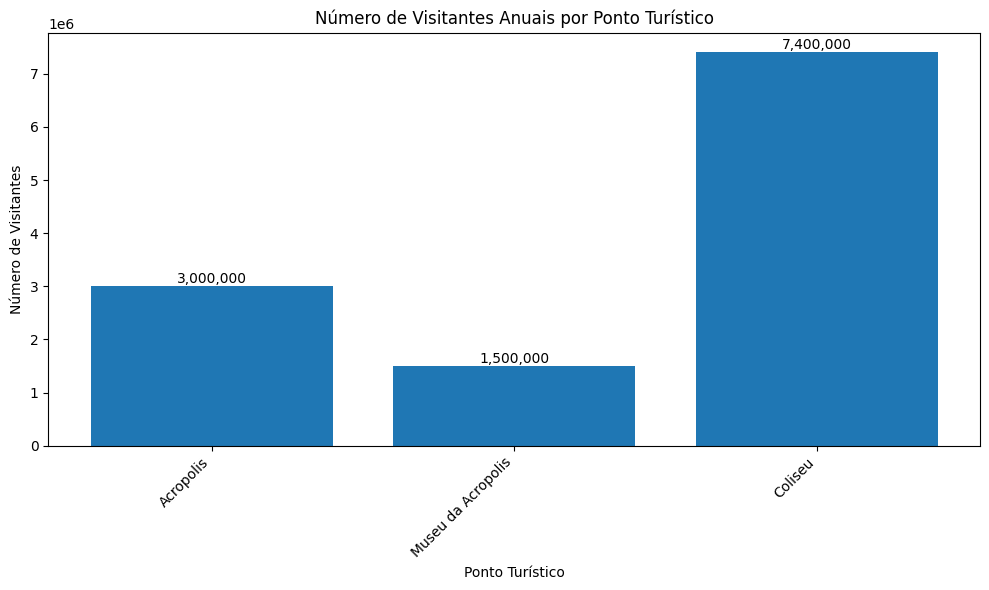

In [85]:
plt.figure(figsize=(10, 6))

plt.bar(df['ponto_turistico'], df['visitantes_anuais'])

plt.title('Número de Visitantes Anuais por Ponto Turístico')
plt.xlabel('Ponto Turístico')
plt.ylabel('Número de Visitantes')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(df['visitantes_anuais']):
    plt.text(i, v, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()